In [42]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import env
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
def acquire_zillow_sfr():
    '''
    This function will retrieve zillow home data for 2017 properties. It will only get
    single family residential properties. the function will attempt to open the data from 
    a local csv file, if one is not found, it will download the data from the codeup
    database. An env file is needed in the local directory in order to run this file.
    '''
    # check to see if a csv of our data exists in the local directory
    if os.path.exists('zillow_2017_sfr.csv'):
        print('opening data from local file')
        df = pd.read_csv('zillow_2017_sfr.csv', index_col=0)
    else:
        # run sql query and write to csv
        print('local file not found')
        print('retrieving data from sql server')
        query = '''
    SELECT 
    bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, 
    taxvaluedollarcnt, yearbuilt, taxamount, fips, lotsizesquarefeet
    FROM properties_2017
    WHERE propertylandusetypeid IN(
        SELECT propertylandusetypeid
        FROM propertylandusetype
        WHERE propertylandusedesc = "Single Family Residential")
    LIMIT 1000
    ;
        '''
        connection = env.get_db_url('zillow')
        df = pd.read_sql(query, connection)
        # create a local csv of the downloaded data
        df.to_csv('zillow_2017_sfr.csv')
    
    # renaming column names to one's I like better
    df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                              'bathroomcnt':'bathrooms', 
                              'calculatedfinishedsquarefeet':'area',
                              'taxvaluedollarcnt':'tax_value', 
                              'yearbuilt':'year_built',
                              'taxamount':'annual_tax',
                              'lotsizesquarefeet':'lot_size'})
    return df

In [44]:
df = acquire_zillow_sfr()
df

local file not found
retrieving data from sql server


,bedrooms,bathrooms,area,tax_value,year_built,annual_tax,fips,lot_size
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,4083.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,11975.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,9403.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,3817.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,9826.0
...,...,...,...,...,...,...,...,...
995,2.0,1.0,802.0,193813.0,1949.0,2516.25,6037.0,10158.0
996,2.0,1.0,1058.0,171289.0,1949.0,2137.34,6037.0,5500.0
997,5.0,5.0,3304.0,877478.0,1956.0,10793.68,6037.0,22126.0
998,5.0,4.0,3808.0,227027.0,1964.0,2990.03,6037.0,13602.0


In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.fips.value_counts()

In [ ]:
df.isna().sum()

In [ ]:
9337 / 2152863

In [ ]:
df[(df.yearbuilt.isna() == True) & (df.calculatedfinishedsquarefeet.isna() == False)
  & (df.taxamount.isna() == False)]

There are properties that don't have a year built, but they have a calculated square feet and tax amount for the property. Could these be properties being built?

notice that all of the rows with a null calculated square feet value has 0 bedrooms, 0 bathrooms and null year built value, which to me indicates that there is no house built on the plot yet. So lets drop the null values.

In [ ]:
df.yearbuilt.dropna()

In [ ]:
2143526 / 2152863

In [ ]:
df.yearbuilt.value_counts().sort_index().dropna()

In [11]:
df = df.dropna()

In [ ]:
for col in df.columns:
    print(df[col].value_counts().sort_index())

we still have houses with 0 bathrooms or 0 bedrooms? places with less than 10 square feet? are they shacks? since this is a small portion of our data, lets drop them also

In [ ]:
df.info()

all of the dtypes are float, do they need to be?

In [ ]:
for col in df:
    print(f'{col}')
    equal_int = (df[col] == df[col].astype(int)).mean()
    print(equal_int)

looks like bathroomcnt and taxamount need to be float, the others can be int

In [12]:
df.bedroomcnt = df.bedroomcnt.astype(int)
df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.astype(int)
df.yearbuilt = df.yearbuilt.astype(int)
df.taxvaluedollarcnt = df.taxvaluedollarcnt.astype(int)
df.fips = df.fips.astype(int)

/var/folders/49/v6sf5vy165dghytk4qv6jfhc0000gn/T/ipykernel_1687/3418949021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bedroomcnt = df.bedroomcnt.astype(int)
/var/folders/49/v6sf5vy165dghytk4qv6jfhc0000gn/T/ipykernel_1687/3418949021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.astype(int)
/var/folders/49/v6sf5vy165dghytk4qv6jfhc0000gn/T/ipykernel_1687/3418949021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  int64  
 3   taxvaluedollarcnt             int64  
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          int64  
dtypes: float64(2), int64(5)
memory usage: 130.6 MB


In [ ]:
mask = ((df.bathroomcnt == 0) | (df.bedroomcnt == 0))
df[mask]

In [ ]:
mask = (df.bathroomcnt == 0) | (df.bedroomcnt == 0)

# df = df[~mask]

df

In [ ]:
df[df.calculatedfinishedsquarefeet <= 100]

In [ ]:
for col in df.columns:
    print(df[col].value_counts())

In [ ]:
df.describe()

In [ ]:
for col in df:
    print(f'distribution of {col}')
    plt.hist(data=df, x=col)
    plt.show()

In [ ]:
for col in df:
    print(f'distribution of {col}')
    sns.boxplot(data=df, x=col)
    plt.show()

In [ ]:
df.drop(df.calculatedfinishedsquarefeet.max())

In [ ]:
# outliers are aything beyond 1.5 times the inner quartile range from the mean
low_outliers = df.calculatedfinishedsquarefeet.mean() - (
    # iqr is quantile(.75) - quantile(.25)
    (df.calculatedfinishedsquarefeet.quantile(.75)
 - df.calculatedfinishedsquarefeet.quantile(.25))
    # times 1.5
* 1.5)

In [ ]:
df[(df.calculatedfinishedsquarefeet <= low_outliers)  ]

In [ ]:
df[(df.calculatedfinishedsquarefeet <= low_outliers)  ].calculatedfinishedsquarefeet.max()

In [ ]:
2909 / 2152863

according to our formula of considering anything less than 1.5 times the inner quartile range below the mean to be an outlier, anything less than 436 sq feet (about 22x20 ft) is an outlier, this is 0.14% of our total dataset.

In [ ]:
# outliers are aything beyond 1.5 times the inner quartile range from the mean
high_outliers = df.calculatedfinishedsquarefeet.mean() + (
    # iqr is quantile(.75) - quantile(.25)
    (df.calculatedfinishedsquarefeet.quantile(.75)
 - df.calculatedfinishedsquarefeet.quantile(.25))
    # times 1.5
* 1.5)

In [ ]:
df[~(df.calculatedfinishedsquarefeet >= high_outliers)]

In [ ]:
142114 / 2152863

In [ ]:
3290 / 57

In [ ]:
df[(df.calculatedfinishedsquarefeet >= high_outliers)  ].calculatedfinishedsquarefeet.min()

according to our formula of considering anything more than 1.5 times the inner quartile range above the mean to be an outlier, anything more than 3,290 sq feet (about 57x58 ft) is an outlier, this is 6.6% of our total dataset. the calculated square feet is definitely right skewed.

In [ ]:
df.isna().sum()

In [ ]:
mask = ((df.calculatedfinishedsquarefeet <= low_outliers) | 
          (df.calculatedfinishedsquarefeet >= high_outliers))
df[~mask]

In [15]:
for col in df:
        # outliers are aything beyond 1.5 times the inner quartile range from the mean
        low_outliers = df[col].quantile(.25) - (
            # iqr is quantile(.75) - quantile(.25)
            (df[col].quantile(.75)
             - df[col].quantile(.25))
            # times 1.5
            * 1.5)
        print(low_outliers)

1.5
0.5
-167.0
-328994.0
1908.5
-3265.770000000001
6004.0


In [6]:
cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 
        'taxvaluedollarcnt', 'taxamount']

In [5]:
def remove_outliers(df, col_list, k=1.5):
    for col in df[col_list]:
        # get the quartiles
        q1, q3 = df[col].quantile([.25, .75])
        # iqr is quantile(.75) - quantile(.25)
        iqr = q3 - q1
        # low outliers are aything beyond 1.5 times the inner quartile range from .25
        low_outliers = q1 - (k * iqr)
        high_outliers = q3 + (k * iqr)
        df = df[(df[col] > low_outliers) & (df[col] < high_outliers)]
    return df

In [7]:
outliers_removed = remove_outliers(df, cols)

In [19]:
outliers_removed = no_out.dropna()

In [8]:
outliers_removed

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0
...,...,...,...,...,...,...,...
2152852,3.0,2.0,1917.0,408680.0,1946.0,4341.32,6111.0
2152853,4.0,2.0,1987.0,259913.0,1955.0,3175.66,6059.0
2152855,3.0,2.5,1809.0,405547.0,2012.0,4181.10,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [17]:
outliers_removed = outliers_removed[outliers_removed.calculatedfinishedsquarefeet > 100]

In [15]:
df[df.calculatedfinishedsquarefeet < 100]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips


distribution of bedroomcnt


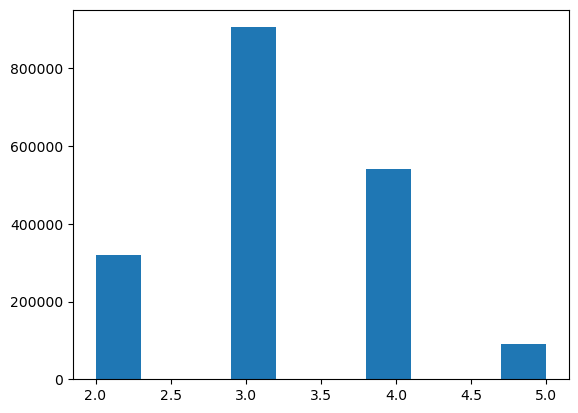

distribution of bathroomcnt


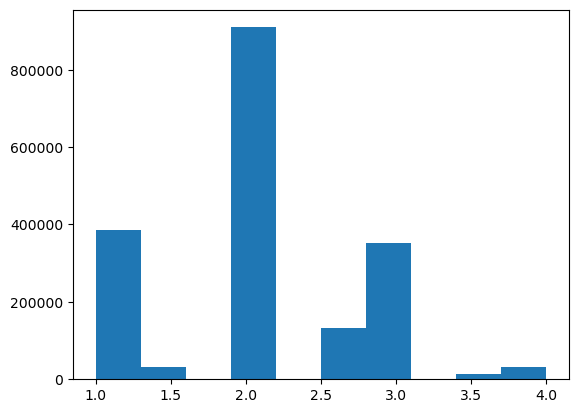

distribution of calculatedfinishedsquarefeet


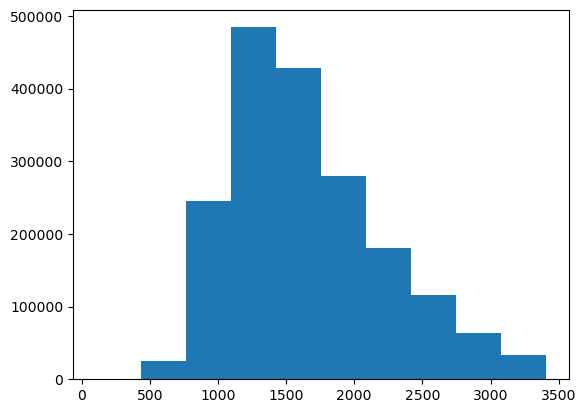

distribution of taxvaluedollarcnt


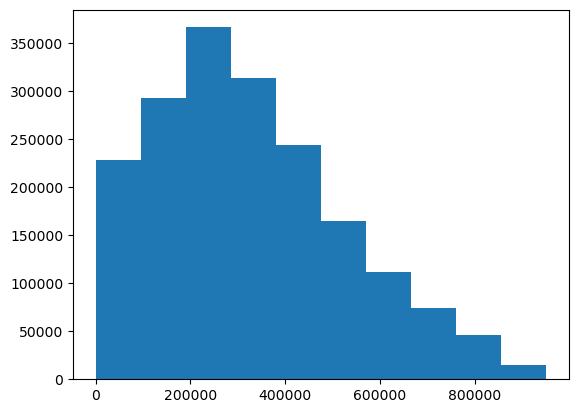

distribution of yearbuilt


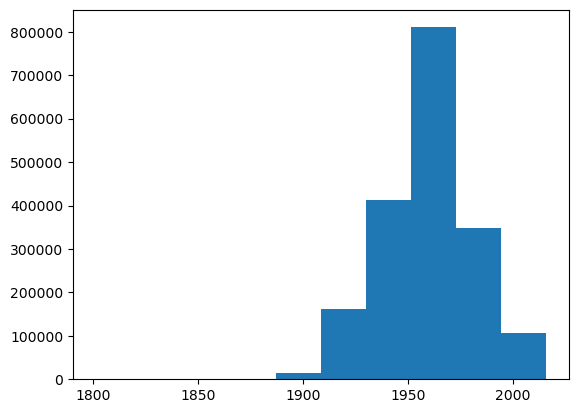

distribution of taxamount


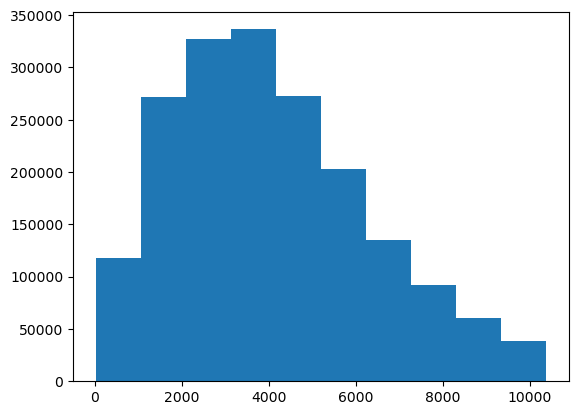

distribution of fips


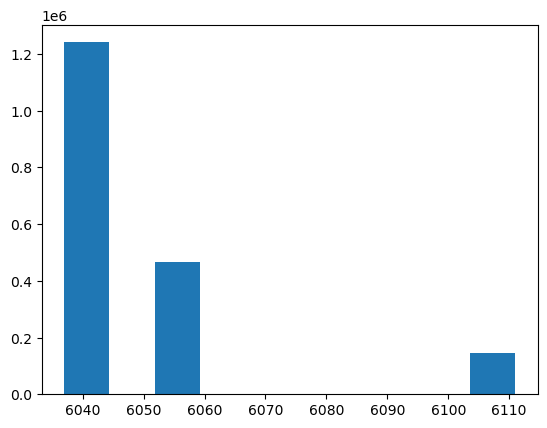

In [18]:
for col in outliers_removed:
    print(f'distribution of {col}')
    plt.hist(data=outliers_removed, x=col)
    plt.show()

distribution of bedroomcnt


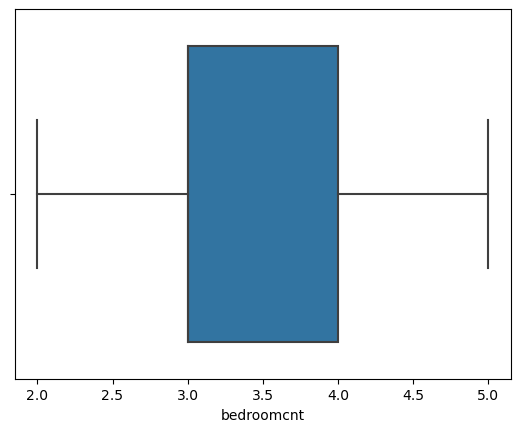

distribution of bathroomcnt


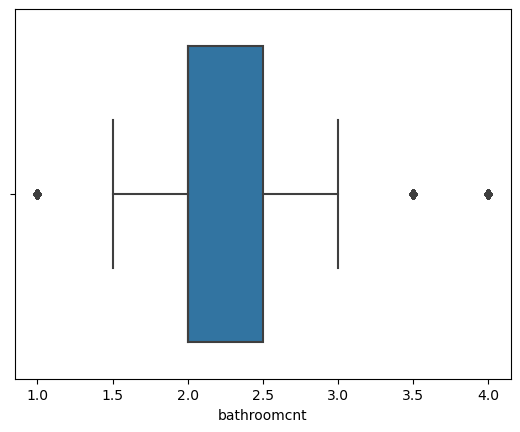

distribution of calculatedfinishedsquarefeet


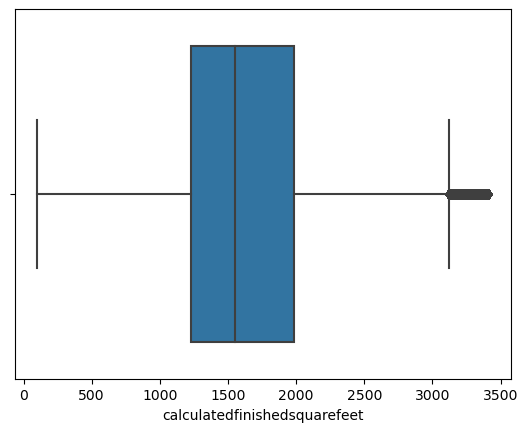

distribution of taxvaluedollarcnt


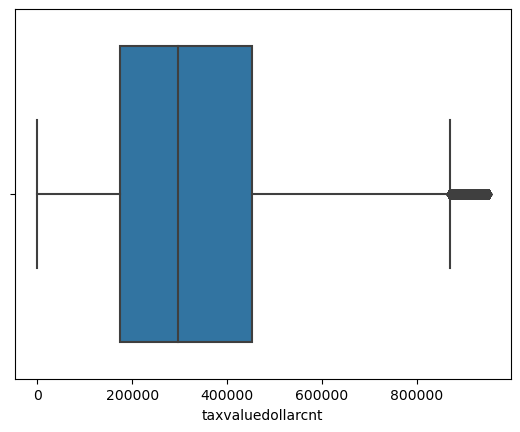

distribution of yearbuilt


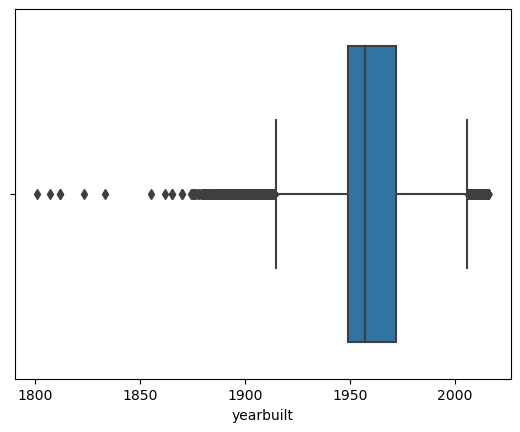

distribution of taxamount


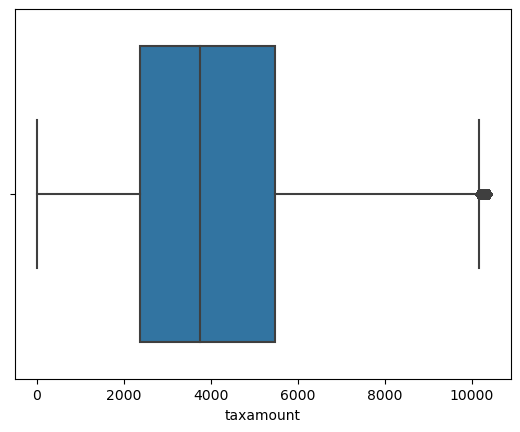

distribution of fips


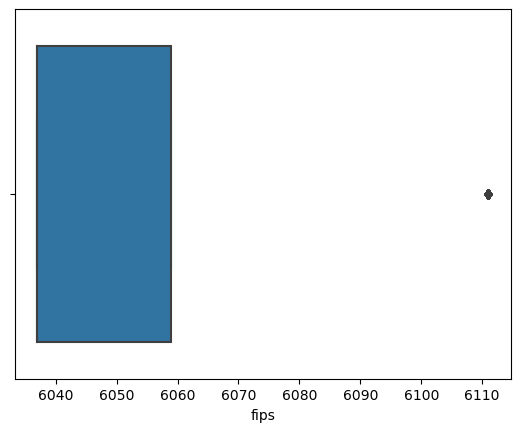

In [19]:
for col in outliers_removed:
    print(f'distribution of {col}')
    sns.boxplot(data=outliers_removed, x=col)
    plt.show()

In [21]:
# if the missing_percent is greater than 0.02, we want to exclude the column
missing_thresh = 0.98
exclude_missing = []
num_rows = df.shape[0]
for col in df.columns:
    num_missing = df[col].isna().sum()
    missing_frac = num_missing / num_rows
    if missing_frac > missing_thresh:
        exclude_missing.append(col)

In [22]:
exclude_missing

[]

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  int64  
 3   taxvaluedollarcnt             int64  
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          int64  
dtypes: float64(2), int64(5)
memory usage: 130.6 MB


In [25]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2140235 non-null  int64  
 1   bathroomcnt                   2140235 non-null  float64
 2   calculatedfinishedsquarefeet  2140235 non-null  int64  
 3   taxvaluedollarcnt             2140235 non-null  int64  
 4   yearbuilt                     2140235 non-null  int64  
 5   taxamount                     2140235 non-null  float64
 6   fips                          2140235 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 130.6 MB


In [37]:
def get_hist(df):
    ''' Gets histographs of acquired continuous variables'''
    
    plt.figure(figsize=(16, 3))

    # List of columns
    cols = [col for col in df.columns if col not in ['fips', 'year_built']]

    for i, col in enumerate(cols):

        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Display histogram for column.
        df[col].hist(bins=5)

        # Hide gridlines.
        plt.grid(False)

        # turn off scientific notation
        plt.ticklabel_format(useOffset=False)

        plt.tight_layout()

    plt.show()
        
        
def get_box(df):
    ''' Gets boxplots of acquired continuous variables'''
    
    # List of columns
    cols = ['bedrooms', 'bathrooms', 'area', 'tax_value', 'annual_tax', 'lot_size']

    plt.figure(figsize=(16, 3))

    for i, col in enumerate(cols):

        # i starts at 0, but plot should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Display boxplot for column.
        sns.boxplot(data=df[[col]])

        # Hide gridlines.
        plt.grid(False)

        # sets proper spacing between plots
        plt.tight_layout()

    plt.show()

In [33]:
def clean_zillow_sfr(df):
    '''
    this function will take in a DataFrame of zillow single family resident data,
    it will then remove rows will null values, then remove rows with 0 bedrooms or 
    0 bathrooms, it will then change dtypes of bedroom, area,
    tax_value, year_built, and fips to integer, and change the column names
    then return the cleaned df
    '''
    # removing outliers
    df = remove_outliers(df, ['bedrooms', 'bathrooms', 'area', 
                              'tax_value', 'annual_tax', 'lot_size'])
    df = df[df.area > 100]

    # remove null values
    df = df.dropna()

    # get distributions of numeric data
    get_hist(df)
    get_box(df)
    
    # converting column datatypes
    # change dtypes of columns to int
    df.bedrooms = df.bedrooms.astype(int)
    df.area = df.area.astype(int)
    df.year_built = df.year_built.astype(int)
    df.tax_value = df.tax_value.astype(int)
    df.fips = df.fips.astype(int)
    # return the cleaned dataFrame
    return df

In [34]:
def split_zillow(df):
    '''
    this function will take in a cleaned zillow dataFrame and return the data split into
    train, validate and test dataframes in preparation for ml modeling.
    '''
    train_val, test = train_test_split(df,
                                      random_state=1342,
                                      train_size=0.8)
    train, validate = train_test_split(train_val,
                                      random_state=1342,
                                      train_size=0.7)
    return train, validate, test

In [35]:
def wrangle_zillow():
    '''
    This function will acquire the zillow dataset, clean the data, and split it
    and return the data as train, validate, test
    '''
    return split_zillow(
        clean_zillow_sfr(
            acquire_zillow_sfr()))

opening data from local file


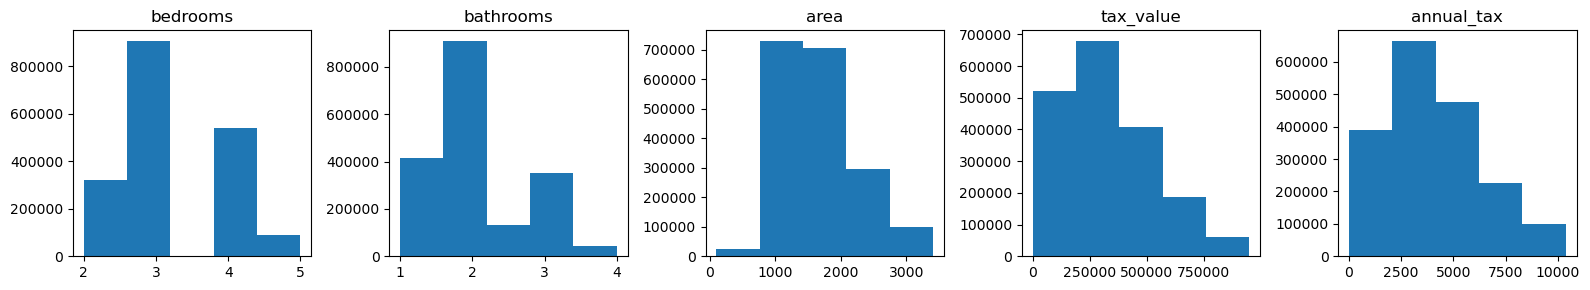

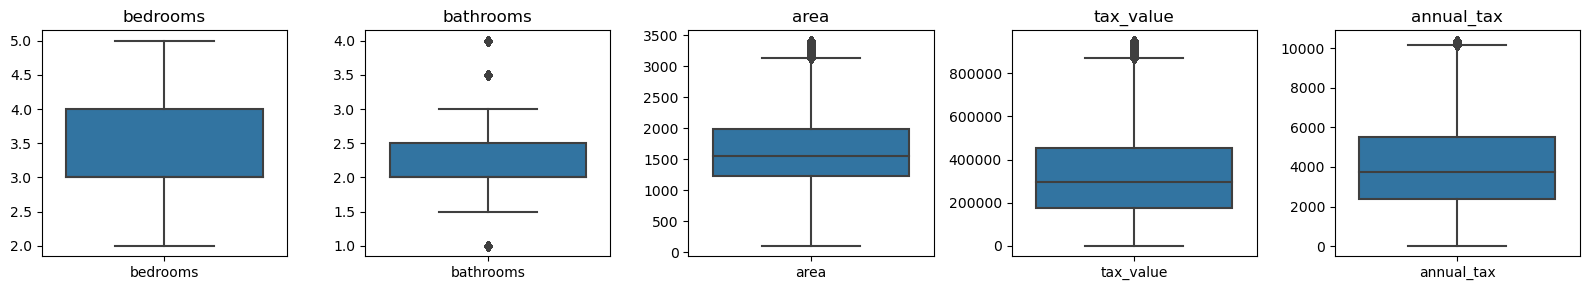

In [38]:
train, validate, test = wrangle_zillow()

In [39]:
train.shape, validate.shape, test.shape

((1038464, 7), (445057, 7), (370881, 7))

In [ ]:
validate.info()

In [40]:
import wrangle

opening data from local file


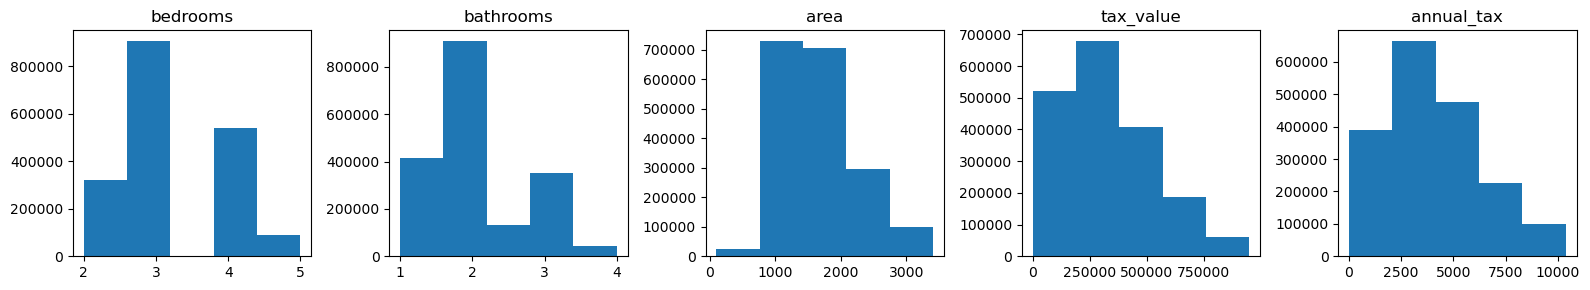

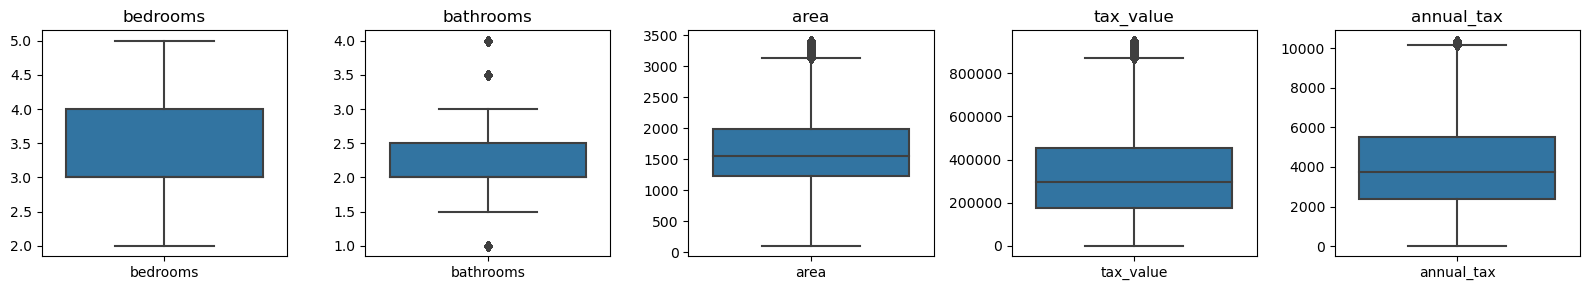

(         bedrooms  bathrooms  area  tax_value  year_built  annual_tax  fips
 1654597         3        1.0   947     128661        1954     1870.84  6037
 328510          3        2.0  1076     244696        1950     3160.45  6037
 599581          2        2.0   897     186833        1942     2499.79  6037
 967268          4        2.5  2520     407094        1977     4680.38  6059
 1495491         3        2.0  1922     134523        1976     1467.24  6059
 ...           ...        ...   ...        ...         ...         ...   ...
 2102829         3        1.0  1090     460811        1939     6322.19  6037
 2032417         3        2.5  2233     784244        1978     8701.78  6059
 876070          3        1.0  1050     416211        1941     5294.69  6037
 1473123         4        2.0  1393     588845        1965     7394.60  6059
 1447121         4        3.0  1911     388188        1924     4740.71  6037
 
 [1038464 rows x 7 columns],
          bedrooms  bathrooms  area  tax_valu

In [41]:
wrangle.wrangle_zillow()